# Introducción a machine Learning con Scikit-Learn

## Objetivo

* Introducir a los estudiantes en el aprendizaje supervizado y no supervisado.
* Familiarizar a los estudiantes con los algoritmos fundamentales de clasificación, regresión y agrupamiento.
* Proporcionar conocimiento práctico mediante la implementacion de modelos utilizando Scikit-learn
* Evaluar el rendimiento de los modelos usando métricas de evaluación y validación cruzada

## Introducción al aprendizaje supervisado y No supervisado

### Definición y diferencias

* **Aprendizaje Supervisado:** Se entrena el modelo con datos de entrada etiquetados. Cada conjunto de datos de entrada está emparejado con su correspondiente etiqueta de salida.
* **Aprendizaje no Supervisado:** El modelo se entrena con datos de entrada sin etiquetas, y el sistem intenta aprender la estructura de los datos sin ninguna orientación.

#### Diferencias clave

* Etiquetas en el entrenamiento
* Tipos de problemas a resolver: predictivos y descriptivos.

### Tipos de problemas:
* **Clasificación:**
    * En Aprendizaje supervisado.
    * Objetivo: Predecir una categoría o clase.
    * Ejemplo: Determinar si un correo electrónico es SPAM.
* **Regresión:**
    * En aprendizaje supervisado.
    * Objetivo: Predecir un valor continuo.
    * Ejemplo: Predecir el precio de una casa basándose en sus características
* **Clustering:**
    * En aprendizaje no supervisado.
    * Objetivo: Agrupar instancias similares en clusters.
    * Ejemplo: Segmentar a los clientes en grupos basándose en sus patrones de compra



### Ejemplos:

In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Clasificación

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


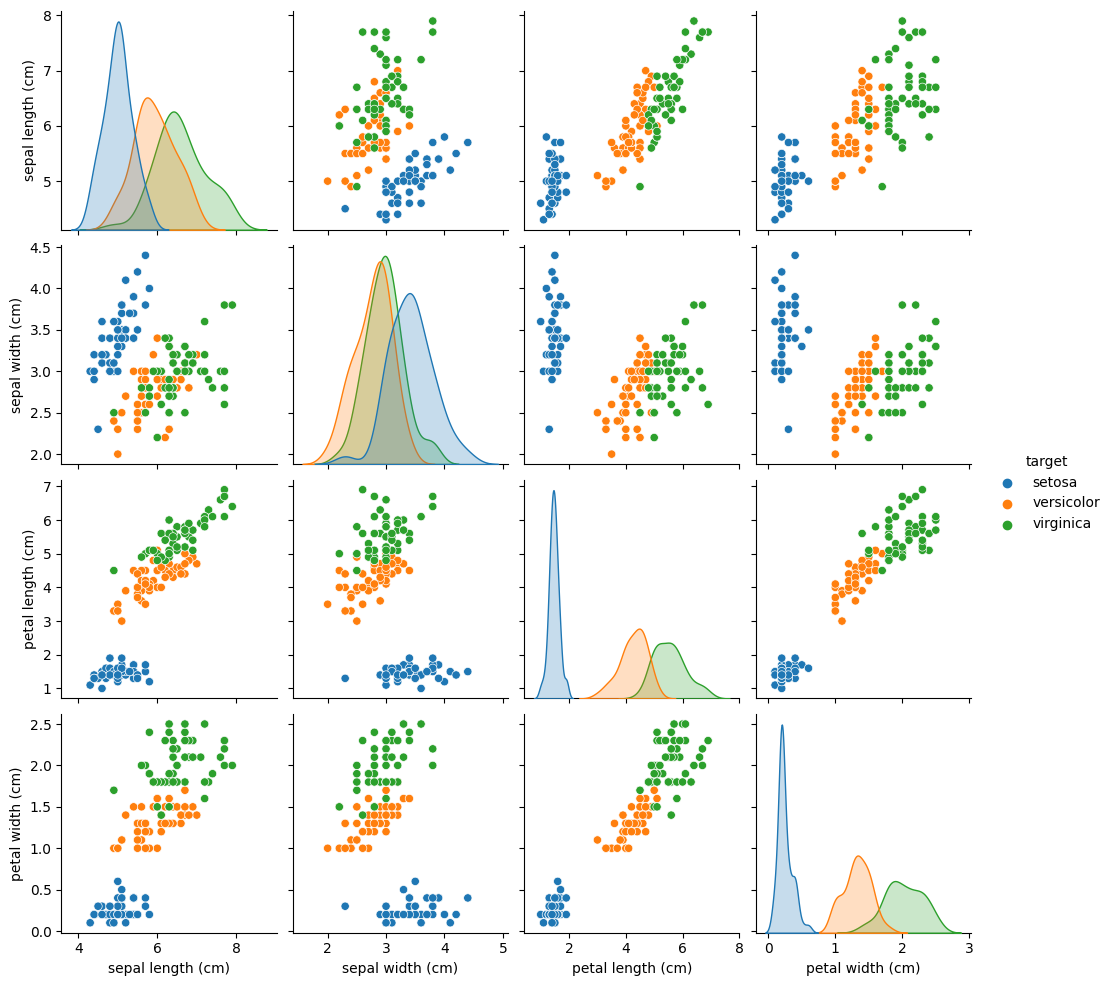

In [29]:
iris = load_iris()
X = iris.data
y = iris.target

names = [iris.target_names[i] for i in y]
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = names
sns.pairplot(df, hue = "target")

In [30]:
## Dividimos el dataset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1997)


In [31]:
clf = LogisticRegression(max_iter = 200)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(f"la presición del modelo de clasificación: {accuracy:.2f}")

la presición del modelo de clasificación: 0.98


<Axes: >

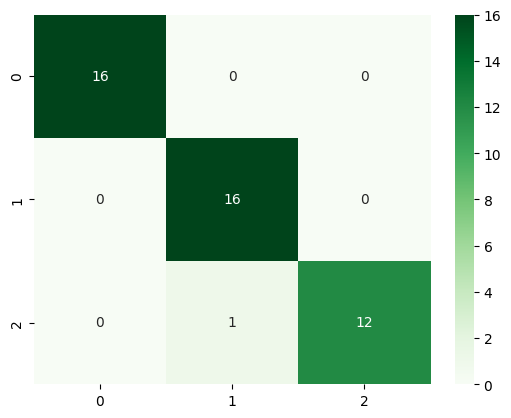

In [32]:
conf = metrics.confusion_matrix(clf.predict(X_test),y_test)
sns.heatmap(conf, annot = True, cmap="Greens")

#### Regresión

In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

boston = fetch_california_housing()
print(boston.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1997)

In [35]:
reg = LinearRegression()
reg.fit(X_train, y_train)


score = reg.score(X_test,y_test)
print(f"Score: {score:.4f}")

Score: 0.9214


### Segmentación de mercado con datos ficticios

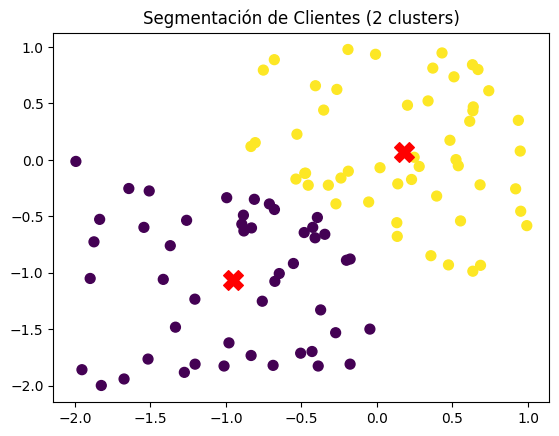

In [36]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
np.random.seed(97)
X = -2 * np.random.rand(100,2)
X1 =  -1 +2 * np.random.rand(50,2)
X[50:100,:] = X1
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
plt.scatter(X[:,0],X[:,1], s = 50, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("Segmentación de Clientes (2 clusters)")
plt.show()

## Algoritmos de clásificación

Las técnicas de clasificación son una parte escencial del machine learning, ya que aproximadamente el 70% de los problemas son de clasificación. entre las técnicas usadas existen las siguientes

### Regresión Logística

La regresión logística es un método estadístico para predecir clases binarias. El resultado o variable objetivo es de naturaleza dicotómica lo que significa que solo hay dos clases posibles. Por ejemplo, se puede utilizar para problemas de detección de cáncer o calcular la probabilidad de que ocurra un evento.

La regresión logística es uno de los algoritmos más simples y más usados para la clasificación de dos clases. Es fácil de implementar y se puede usar como línea de base para cualquier problema de clasificación binaria. La regresión logística describe y estima la relación entre una variable binaria dependiente y variables independientes.

En general, este algoritmo se puede utilizar para varios probelas de clasificación, como la detección de spam, predicción de la diabetes, si un cliente determinado comprará un producto en particular o se irá a la competencia.

Por su parte la regresión logística lleva el nombre de la función utilizada en el núcleo del métod, la función logística es también llamada función sigmoide. Esta función es una curva en forma de s que puede tomar cualquier número de valor real y asignar un valor entre 0 y 1

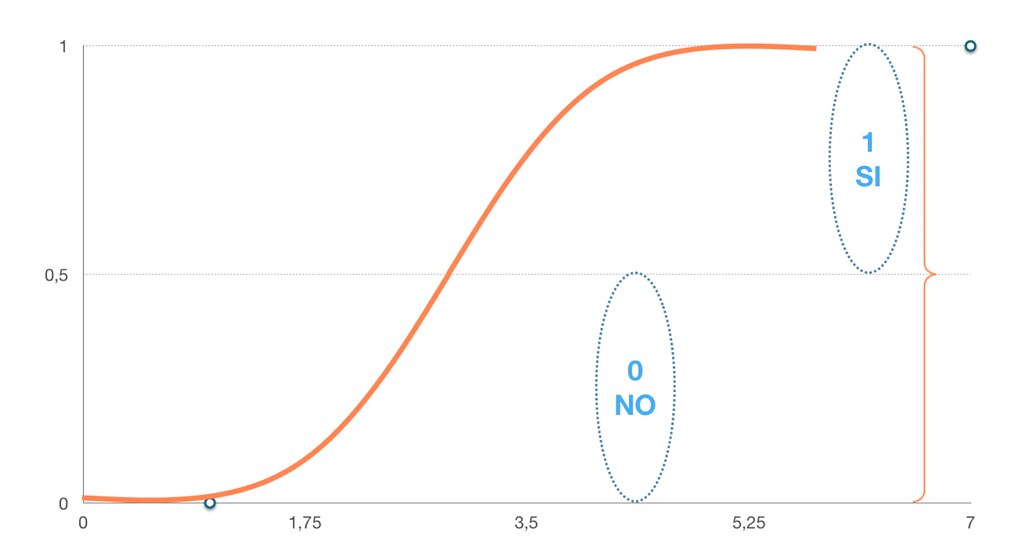

Si la curva va a infinito positivo en la predicción se convertirá en 1, y si la curva tiende a infinito negativo, la predicción se convertirá en 0, si la salida de la función sigmoide es mayor que 0.5, podemos clasificar el resultado como 1 o Si, y si es menor que 0.5 podemos clasificarlo como 0 o No.

Partiendo desde la regresión lineal se tiene:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_n x_n$$

donde y es la variable dependiente y $x_1, x_2,..., x_n$ son variables explicativas

vista en expresión matemática la función sigmoide se comporta de la siguiente manera

$$P = \frac{1}{1+e^{-y}}$$

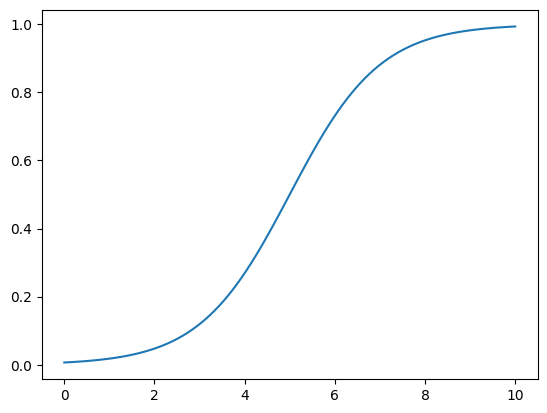

In [37]:
x = np.linspace(0,10,100)
p = 1/(1+np.exp(-x+5))
plt.plot(x,p)

al aplicar la función sigmoide a la regresión lineal nos quedaría de la siguiente manera:

$$p = \frac{1}{1+e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_n x_n)}}$$

In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

In [39]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Visualicemos algunos componentes de la data.

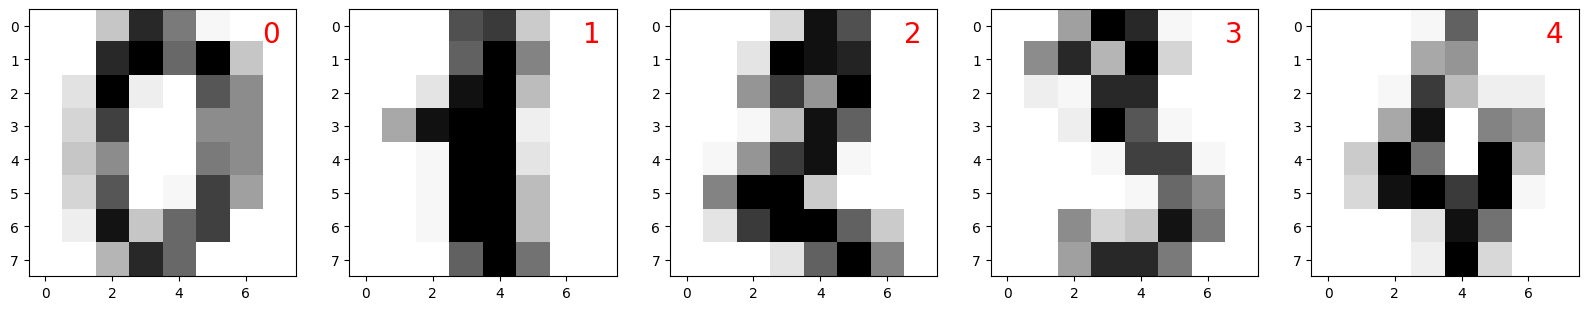

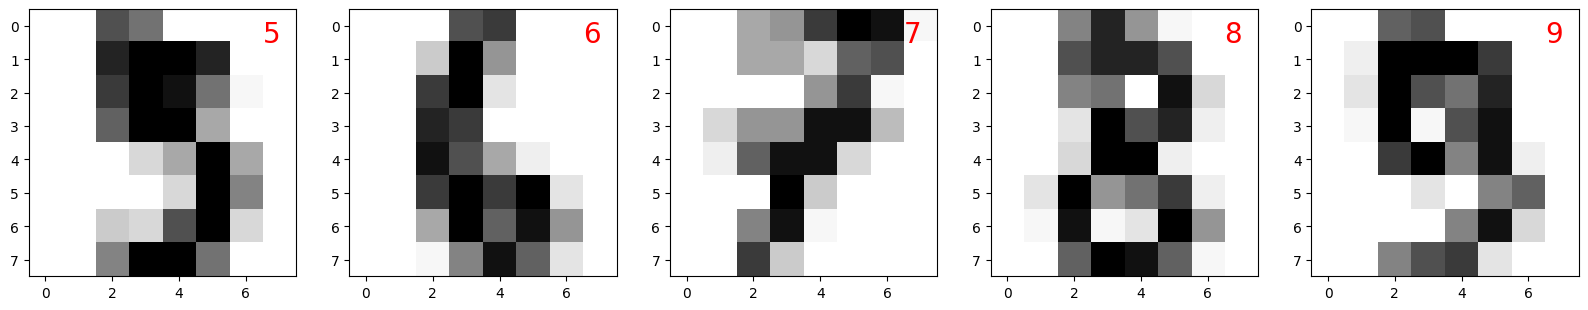

In [40]:
plt.figure(figsize=(20,4))
for i in range(0,5):
    plt.subplot(1,5,i+1)
    plt.imshow(digits.images[i], cmap="Greys")
    plt.annotate(digits.target[i], c = "r" ,xy = (6.5,0.5), fontsize = 20)

k=5
plt.figure(figsize = (20,4))
for i in range(0,5):
    #print(i)
    j=int(i+k)
    plt.subplot(1,5, i+1)
    plt.imshow(digits.images[j], cmap = "Greys")
    plt.annotate(digits.target[j], c = "r" ,xy = (6.5,0.5), fontsize = 20)


Ahora podemos definir las variables "x", y "y" que se van a emplear para el modelo

In [41]:
X_train,X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=.2)

In [42]:
from sklearn.linear_model import LogisticRegression
log1 = LogisticRegression(max_iter=1000,verbose=1, tol = 1e-6)
log1.fit(X_train, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          650     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.30881D+03    |proj g|=  1.45930D+03

At iterate   50    f=  1.73345D+01    |proj g|=  4.80067D+00

At iterate  100    f=  1.44747D+01    |proj g|=  2.00647D+00

At iterate  150    f=  1.42083D+01    |proj g|=  3.90570D-01

At iterate  200    f=  1.41788D+01    |proj g|=  3.01692D-01


 This problem is unconstrained.



At iterate  250    f=  1.41447D+01    |proj g|=  9.79412D-01

At iterate  300    f=  1.39442D+01    |proj g|=  1.09513D+00

At iterate  350    f=  1.37038D+01    |proj g|=  3.78024D-01

At iterate  400    f=  1.36433D+01    |proj g|=  4.55998D-01

At iterate  450    f=  1.36343D+01    |proj g|=  3.96118D-02

At iterate  500    f=  1.36311D+01    |proj g|=  7.94010D-02

At iterate  550    f=  1.36109D+01    |proj g|=  5.16008D-01

At iterate  600    f=  1.34960D+01    |proj g|=  4.84698D-01

At iterate  650    f=  1.34027D+01    |proj g|=  1.80614D-01

At iterate  700    f=  1.33920D+01    |proj g|=  7.25736D-02

At iterate  750    f=  1.33909D+01    |proj g|=  2.86588D-02

At iterate  800    f=  1.33895D+01    |proj g|=  5.44988D-02

At iterate  850    f=  1.33823D+01    |proj g|=  2.75411D-01

At iterate  900    f=  1.33707D+01    |proj g|=  1.18913D-01

At iterate  950    f=  1.33663D+01    |proj g|=  4.72590D-02

At iterate 1000    f=  1.33657D+01    |proj g|=  1.27190D-02

       

/home/codespace/.python/current/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, tol=1e-06, verbose=1)

In [43]:
predictions = log1.predict(X_test)

In [44]:
score = log1.score(X_test, y_test)
score

0.95

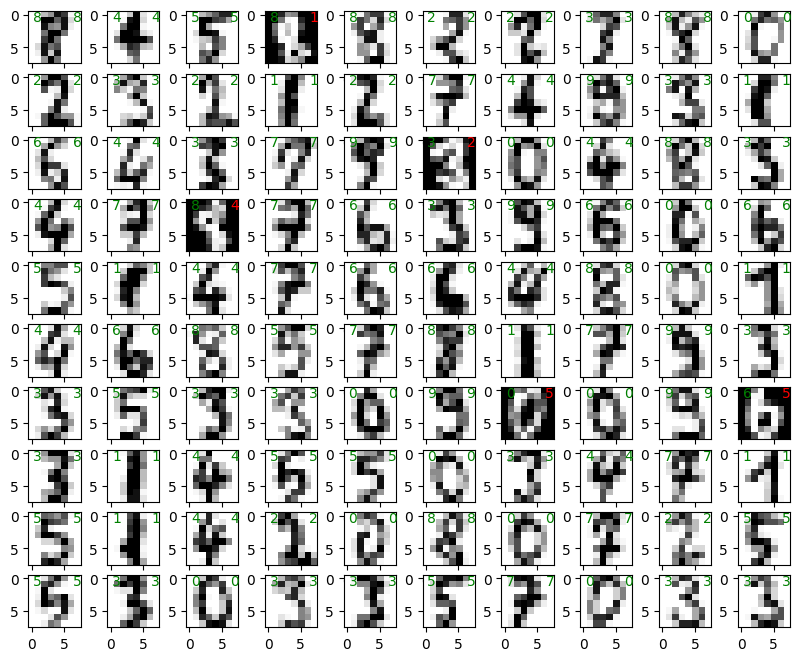

In [45]:
plt.figure(figsize=(10,8))
for i in range(0,100):
    plt.subplot(10,10,i+1)
    color = "Greys" if y_test[i] == predictions[i] else "Greys_r"

    plt.imshow(X_test[i].reshape(8,8),cmap=color)
    color = "r" if y_test[i] != predictions[i] else "g"
    plt.annotate(y_test[i], fontsize = 10, xy = (0.25,1),c = "g")
    plt.annotate(predictions[i], fontsize = 10, xy = (6.25,1), c = color)


Text(0.5, 1.0, 'Score 0.95')

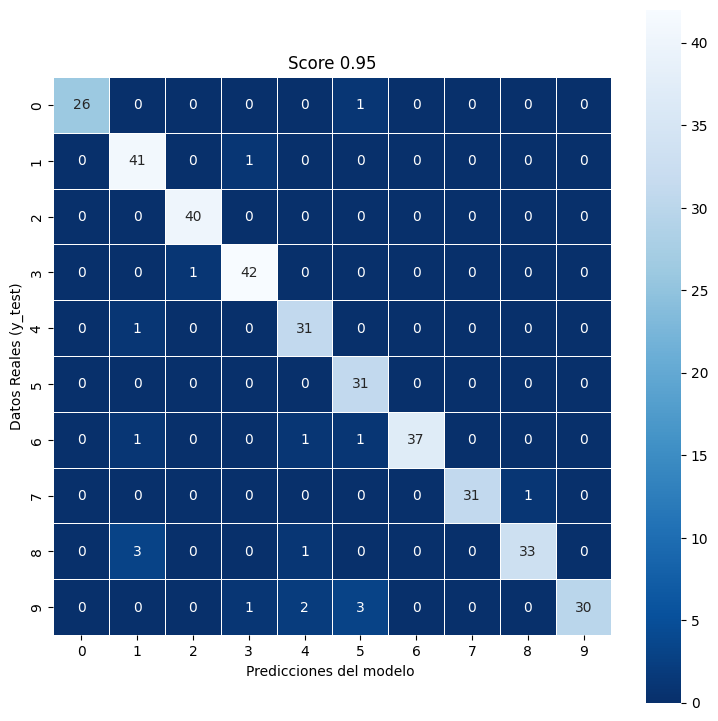

In [46]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize = (9,9))
sns.heatmap(cm,  cmap = "Blues_r",annot=True,linewidths=0.5,square=True)
plt.ylabel("Datos Reales (y_test)")
plt.xlabel("Predicciones del modelo ")
plt.title("Score {:.2f}".format(score))

### Arboles de decisión

Los arboles de decisión son algoritmos de aprendizaje supervisado que se utilizan tanto en las tareas de clasificación como de regresión. La idea detrás de ellos es dividir un conjunto de datos en subconjuntos más pequeños y más simples basándose en decisiones tomadas a partir de las características de entrada.

#### Conceptos clave

1. **Nodo Raiz**: Aquí es donde inicia el arbol. Incluye todo el conjunto de datos y representa la característica que proporciona la máxima "información" sobre la división, es decir, la característica que mejor divide el conjunto de datos en clases o vectores.
2. **Nodos internos**: Representan características que conducen a una decisión, es decir, a una subdivisión del subconjunto de datos. Al igual que el nodeo raiz, se eligen basandose en el aporte de información o la reducción de impureza que proporcionan.
3. **Ramas**: Son las salidas de los nodos y representan decisiones. LLevan a un hijo nodo.
4. **Nodos Hoja:** Son los nodos finales del árbol, donde se toma una decisión final. En un árbol de clasigicación, esto sería una etiqueta/clase. En un arbol de regresión, sería un valor.

#### Como funciona
La idea es hacer preguntas que subdividan los datos de manera eficaz. Para entender qué pregunta (basada en qué característica) se debe hacer, se usan conceptos como **entropía** y **ganancia de información** o **índice Gini** para cuantificar qué tan bien una característica divide el conjunto de datos.

1. **Entropía**: Es una medida de la impureza o desorden de un conjunto. Si todos los datos son de la misma clase, la entropía es 0 (puro). Si los datos están igualmente divididos entre las clases, la entropía es máxima.
2. **Ganancia de información**: Es la reducción en la entropía lograda al dividir un conjunto de datos basado en una característica. el objetivo es maximizar la ganancia de información con cada división, es decir, reducir la impureza.
3. **Indice Gini:** Es otra métrica que mide la impureza de un conjunto. Un conjunto puro tiene un indice de Gini de 0.

[Text(0.2857142857142857, 0.9, 'X[1] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.42857142857142855, 0.7, 'X[0] <= 1.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5714285714285714, 0.5, 'X[0] <= 2.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7142857142857143, 0.3, 'X[0] <= 3.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

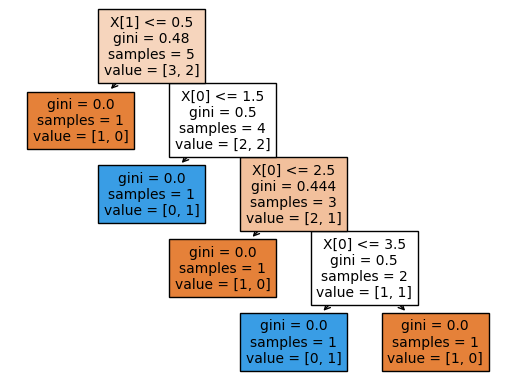

In [47]:
from sklearn import tree
X = [[0,0],[1,1],[2,2],[3,3],[4,4]]
Y = [0,1,0,1,0]
clf = tree.DecisionTreeClassifier()
clf.fit(X,Y)

clf.predict([[2,2]])
clf.predict_proba([[2,2]])
tree.plot_tree(clf, filled=True)

In [48]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

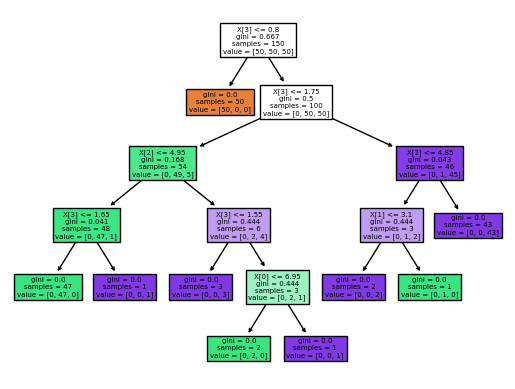

In [49]:
tree.plot_tree(clf, filled=True)

Automatically created module for IPython interactive environment


/tmp/ipykernel_1108/121780164.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_1108/121780164.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
/tmp/ipykernel_1108/121780164.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_1108/121780164.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
/tmp/ipykernel_1108/121780164.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_1108/121780164.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=0.5, w_p

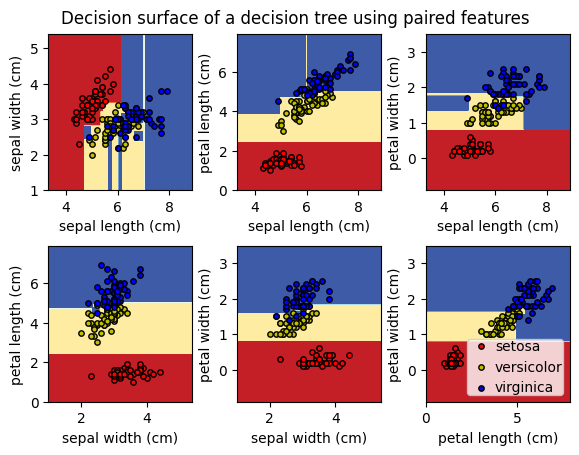

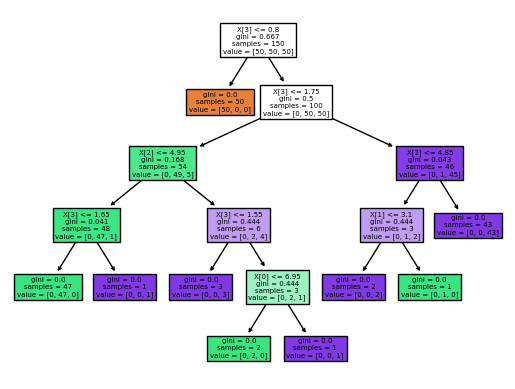

In [50]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

#### Ventajas
1. **Interpretabilidad:** Una de las principales ventajas de los arboles de decisión a demás de ser intuitivos y fácilmente interpretables. Se puede visualizar y entender sin requerir un conocimineto especializado en el área.
2. **Capacidad de manejar datos no lineales:** Pueden capturar relaciones no lineales de los datos
3. **Pueden manejar características categóricas:** No es necesario codificar las características categóricas, ya que el arbol puede dividirlas directamente.

#### Desventajas

1. **Sobreajuste (overfitting):** Los árboles de decisión tienden a memorizar los datos, especialmente si el árbol es muy profundo. Esto significa que pueden tener un rendimiento excepcional en los datos de entrenamiento pero no generalizar bien a datos no vistos.

2. **Sensibilidad:** Pequeñas variaciones en los datos pueden producir árboles muy diferentes.

3. **Puede no ser óptimo:** El algoritmo es codicioso, es decir, toma decisiones óptimas localmente en cada paso, pero estas decisiones locales no siempre conducen a una solución globalmente óptima.

Para superar algunas de estas desventajas, a menudo se utilizan conjuntos de árboles, como el **Random Forest** o el **Gradient Boosted Trees**, que construyen múltiples árboles y los combinan para obtener predicciones más robustas y precisas.

### Maquinas de soporte vectorial

Máquinas de vector de soporte o (SVMs) son un conjuntos de métodos de aprendizaje supervisado que se utilizan para clasificación, regresión y detección de outliers. El objetivo principal de una SVM en el contexto de la clasificación es encontrar un hiperplano óptimo que separe de manera clara las clases de datos.

#### Conceptos clave
1. **Hiperplano:** En el contexto de SVM, un hiperplano es una línea que divide el espacio de entrada en dos partes, donde cada parte representa una clase diferente. En dos dimensiones, este hiperplano es simplemente una línea. En tres dimensiones, es un plano, y en más dimensiones, se llama hiperplano.
2. **Separación Óptima:** La SVM busca el hiperplano que maximiza el margen entre las dos clases. El margen se define como la distancia mínima entre los puntos de entrenamiento y el hiperplano. Los puntos más cercanos al hiperplano que maximizan el margen son conocidos como "vectores de soporte".
3. **Vectores de soporte:** Los vectores de soporte son los puntos de datos más cercanos al hiperplano, estos puntos son esencialmente los más "difíciles de clasificar" y tienen la influencia más directa en la ubicación y orientación del hiperplano. Usar solo estos puntos permite que la SVM sea menos sensible al ruido en los datos.
4. **Kernel Trick:** En muchas situaciones, los datos no son linealmente separables; es decir, no hay un hiperplano lineal que pueda separa las clases. En tales casos, las SVM utilizan los que se llama el "truco del kernel" para transformar los datos a un espacio de mayor dimensión donde se pueda encontrar un hiperplano separador. Los kernels más comunes incluyen el lineal, polinómico, RBF (función de base radial) y sigmoide.
5. **Margen duro vs. Margen Suave:**
En el mundo real, los datos raramente son completamente separables en un margen claro. Por ello, se permite que las SVM tengan lo que se llama un "magen suave", que permite que algunos puntos violen el margen y hasta cierto punto incluso estén en el lado equivocado del hiperplano. Esto ces contrala con un parámetro conocido como "C". un "C" más alto conduce a un margen mas duro y un "C" más bajao a un margen más suave.

#### Como funciona
Las SVM buscan encontrar la forma óptima de clasificación entre varias clases. La clasificación óptima se realiza maximizando el margen de separación de las clases. Los vectores que definen el borde de esta separación son vectores de soporte. La idea básica de SVM consiste en realizar un mapeo de los datos de entrenamiento a un espacio de mayor dimensión, donde se puede realizar una regresión Lineal. El proceso detallado se describe a continuación:
1. **Identificación del Hiperplano Optimo:** Las SVM buscan el "mejor" hiperplano que separa los puntos de datos en diferentes clases. El mejor hiperplano para un SVM es el que presenta el mayor margen entre los puntos de datos más cercanos de diferentes clases. Estos puntos se llaman vectores de soporte.
2. **Transformación con Kernels:** Si los datos no son linealmente separables, las SVM pueden emplear un técnica conocida como el "truco de kernel" para transformar los datos a un espacio de dimensiones superiores donde sí sean separables.
3. **Optimización:** La SVM resuelve un problema de optimización para encontrar los parámetros del hiperplano que minimizan una función de error, sujeta a ciertas restricciones. Esta función está diseñada para penalizar errores en la clasificación y regular la complejidad del modelo.
4. **Clasificación:** Una vez que se ha determinado el hiperplano, se utiliza para clasificar nuevos puntos de datos. Dependiendo de en qué lado del hiperplano caigan los datos, se asigna una clase u otra.

**Formulación del Problema:**

Imaginemos que se tiene un conjunto de datos de entrenamiento de $n$ puntos de la forma $(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), ..., (\mathbf{x}_n, y_n)$ donde $\mathbf{x}_i \in \mathbb{R}^d$ y $y_i \in \{-1,1\}$ (las clases). El objetivo es encontrar el hiperplano óptimo que separe las clases, es decir, que clasifique correctamente el máximo número de puntos.

Un hiperplano en $\mathbb{R}^d$ es un conjunto de puntos $\mathbf{x}$ que satisfacen:

$$
\mathbf{w} \cdot \mathbf{x} - b = 0
$$

donde $\mathbf{w}$ es el vector normal al hiperplano y $b$ es el término de sesgo. El vector $\mathbf{w}$ determina la orientación del hiperplano y $b$ determina la distancia del hiperplano al origen a lo largo del vector normal.

**2. Margen y Vectores de Soporte:**

El margen se define como la distancia total que separa las clases en el hiperplano. Los vectores de soporte son los puntos que están más cerca del hiperplano y, en efecto, "soportan" el margen. La SVM busca maximizar este margen, encontrando el hiperplano óptimo que tenga el mayor margen posible.

Para un punto de datos $(\mathbf{x}_i, y_i)$, la distancia desde el punto hasta el hiperplano se puede calcular como:

$$
\frac{{y_i(\mathbf{w} \cdot \mathbf{x}_i - b)}}{{\|\mathbf{w}\|}}
$$

La SVM busca maximizar esta distancia para el punto más cercano en cada clase (los vectores de soporte). Por lo tanto, nos lleva a un problema de optimización.

**3. Problema de Optimización:**

La formulación del problema se convierte en:

$$
\text{minimizar } \frac{1}{2}\|\mathbf{w}\|^2
$$

sujeto a las restricciones:

$$
y_i(\mathbf{w} \cdot \mathbf{x}_i - b) \geq 1, \quad i = 1, ..., n
$$

Este es un problema de optimización cuadrática convexa que se puede resolver utilizando métodos de programación cuadrática.

**4. Kernels y el Truco del Kernel:**

Si los datos no son linealmente separables, podemos proyectarlos en un espacio de dimensiones superiores donde sí lo sean utilizando una función de kernel $K$. El truco del kernel nos permite hacer esto sin tener que calcular explícitamente las coordenadas de los puntos de datos en ese espacio de dimensiones superiores, sino simplemente calculando el producto escalar de los pares de datos en ese espacio.

En lugar de calcular el producto escalar $\mathbf{x}_i \cdot \mathbf{x}_j$ en el espacio original, calculamos $K(\mathbf{x}_i, \mathbf{x}_j)$ en el espacio de características proyectado.

Las funciones de kernel comunes incluyen:

- Lineal: $K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j$
- Polinómico: $K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma (\mathbf{x}_i \cdot \mathbf{x}_j) + r)^d$
- RBF (Función de Base Radial): $K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2)$
- Sigmoide: $K(\mathbf{x}_i, \mathbf{x}_j) = \tanh(\gamma (\mathbf{x}_i \cdot \mathbf{x}_j) + r)$

**5. Clasificación de Nuevos Puntos:**

Una vez que tienes el modelo (i.e., $\mathbf{w}$ y $b$), puedes clasificar un nuevo punto $\mathbf{x}$ calculando el signo de la función de decisión:

$$
f(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} - b
$$

Si $f(\mathbf{x}) \geq 0$, entonces $\mathbf{x}$ se clasifica como $1$; de lo contrario, se clasifica como $-1$.

Esta es una visión general muy simplificada de las SVM. Hay muchos detalles adicionales cuando se entra en la implementación, especialmente cuando se trata de resolver el problema de optimización y en el caso de datos no separables linealmente. Además, hemos asumido que los datos son perfectamente separables, lo cual rara vez es el caso en aplicaciones prácticas. Las SVM suaves permiten cierta

violación de margen para acomodar datos ruidosos y no perfectamente separables.

#### Kernel
Los kernel en una Máquina de Vectores de Soporte son funciones utilizadas para transformar los datos de entrada en una forma adecuada para la resolución de problemas de clasificación y regresión, Diferentes kernel pueden ayudar a manejar diferentes tipos de relaciones no lineales entre los datos.



**Kernel Lineal**

El kernel lineal es en esencia el caso más simple de SVM, donde el límite de decisión es un hiperplano lineal. Funciona bien cuando los datos son linealmente separables, y es menos costoso en términos computacionales.

In [62]:
from sklearn import datasets
X, y = datasets.make_circles(noise=0.2, factor=0.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1997)
svc = SVC(kernel = "linear")
svc.fit(X_train,y_train)
svc.score(X_test,y_test)


0.3333333333333333

- No transforma los datos en un espacio de mayor dimensión.
- Se utiliza cuando los datos ya son linealmente separables.
- No hay cambio en la forma o distribución de los datos.

**Kernel Polinómico:**

Este kernel eleva el espacio de entrada a un espacio de características polinómico, lo que permite la clasificación no lineal. Puede manejar situaciones en las que la relación entre las características de clase no es lineal.


In [64]:
svc = SVC(kernel='poly', degree=3)  # degree controla el grado del polinomio
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.6666666666666666

- Transforma los datos a un espacio de mayor dimensión basado en un polinomio de grado 'd'.
- Hace que los conjuntos de datos originalmente no separables se vuelvan separables al "curvar" el espacio.

**Kernel de Base Radial (RBF)**

También conocido como kernel Gaussiano, el RBF puede mapear el espacio de entrada a un espacio de características infinito, y es útil para manejar casos en los que la relación entre las etiquetas de clase y las características es compleja y no lineal. Es capaz de crear límites de decisión complejos.

In [65]:
svc = SVC(kernel='rbf', gamma='scale')  # gamma controla la influencia de un solo ejemplo de entrenamiento
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.8333333333333334

- Potencialmente proyecta datos a un espacio de infinitas dimensiones.
- Puede hacer que cualquier conjunto de datos sea linealmente separable al transformar el espacio de manera muy flexible.
- Esencialmente, añade nuevas características que son medidas de similitud (funciones de base radial) entre puntos de datos y ciertos puntos de referencia.

**Kernel Sigmoide**

Este kernel transforma el espacio de características a uno usando una función sigmoide, que es similar a la función de activación utilizada en los perceptrones multicapa, una forma de red neuronal. Puede ser útil en casos que se asemejan a problemas de clasificación binaria.

In [66]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.5666666666666667

- Transforma los datos de manera similar a las neuronas en una red neuronal.
- Puede ser utilizado para simular un perceptrón multicapa.

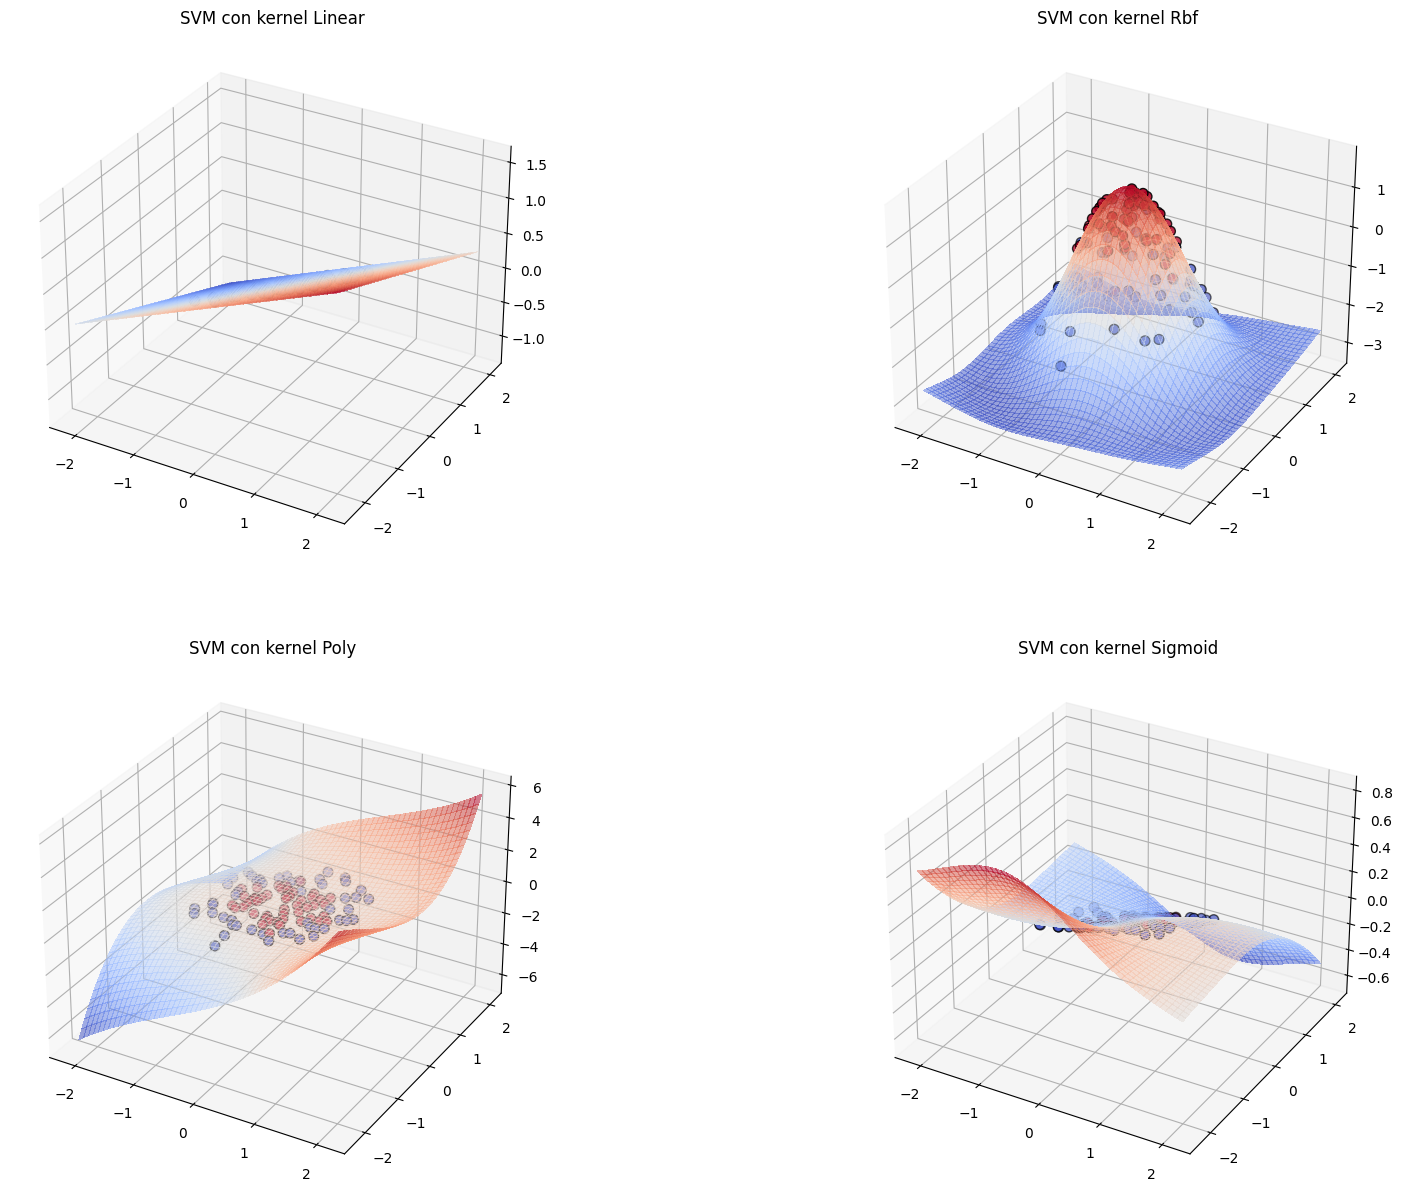

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# Crear un conjunto de datos simulados
X, y = datasets.make_circles(noise=0.2, factor=0.5, random_state=1)

# Entrenar diferentes modelos de SVM
kernels = ['linear', 'rbf','poly', 'sigmoid']
trained_models = []

for kernel in kernels:
    clf = SVC(kernel=kernel, gamma='auto').fit(X, y)
    trained_models.append(clf)

# Títulos para los gráficos
titles = ['SVM con kernel ' + kernel.capitalize() for kernel in kernels]

# Configurar 4 subplots en 3D
fig, sub = plt.subplots(2, 2, figsize=(20, 15), subplot_kw={'projection': '3d'})

# Aplanar array de subplots para iterar más fácilmente
sub = sub.flatten()

# Generar espacio de características para la evaluación de los modelos
X0, X1 = X[:, 0], X[:, 1]
xx, yy = np.meshgrid(np.linspace(X0.min() - 1, X0.max() + 1, 50),
                     np.linspace(X1.min() - 1, X1.max() + 1, 50))

# Bucle para la visualización
for clf, title, ax in zip(trained_models, titles, sub):
    # Calcular la función de decisión
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Calcular la función de decisión para los puntos de datos reales
    Z_points = clf.decision_function(X)
    
    # Agregar puntos de datos
    ax.scatter(X0, X1, Z_points, c=y, s=50, edgecolors='k', cmap=plt.cm.coolwarm)
    # Hacer gráficos en 3D
    ax.plot_surface(xx, yy, Z, rstride=1, cstride=1, linewidth=0, antialiased=False, cmap=plt.cm.coolwarm, alpha=0.5)


    ax.set_title(title)

# Agregar una barra de colores para indicar los valores
# fig.colorbar(ax.plot_surface(xx, yy, Z, rstride=1, cstride=1, linewidth=0, antialiased=False, cmap=plt.cm.coolwarm), ax=sub, shrink=0.5, aspect=10)

plt.show()


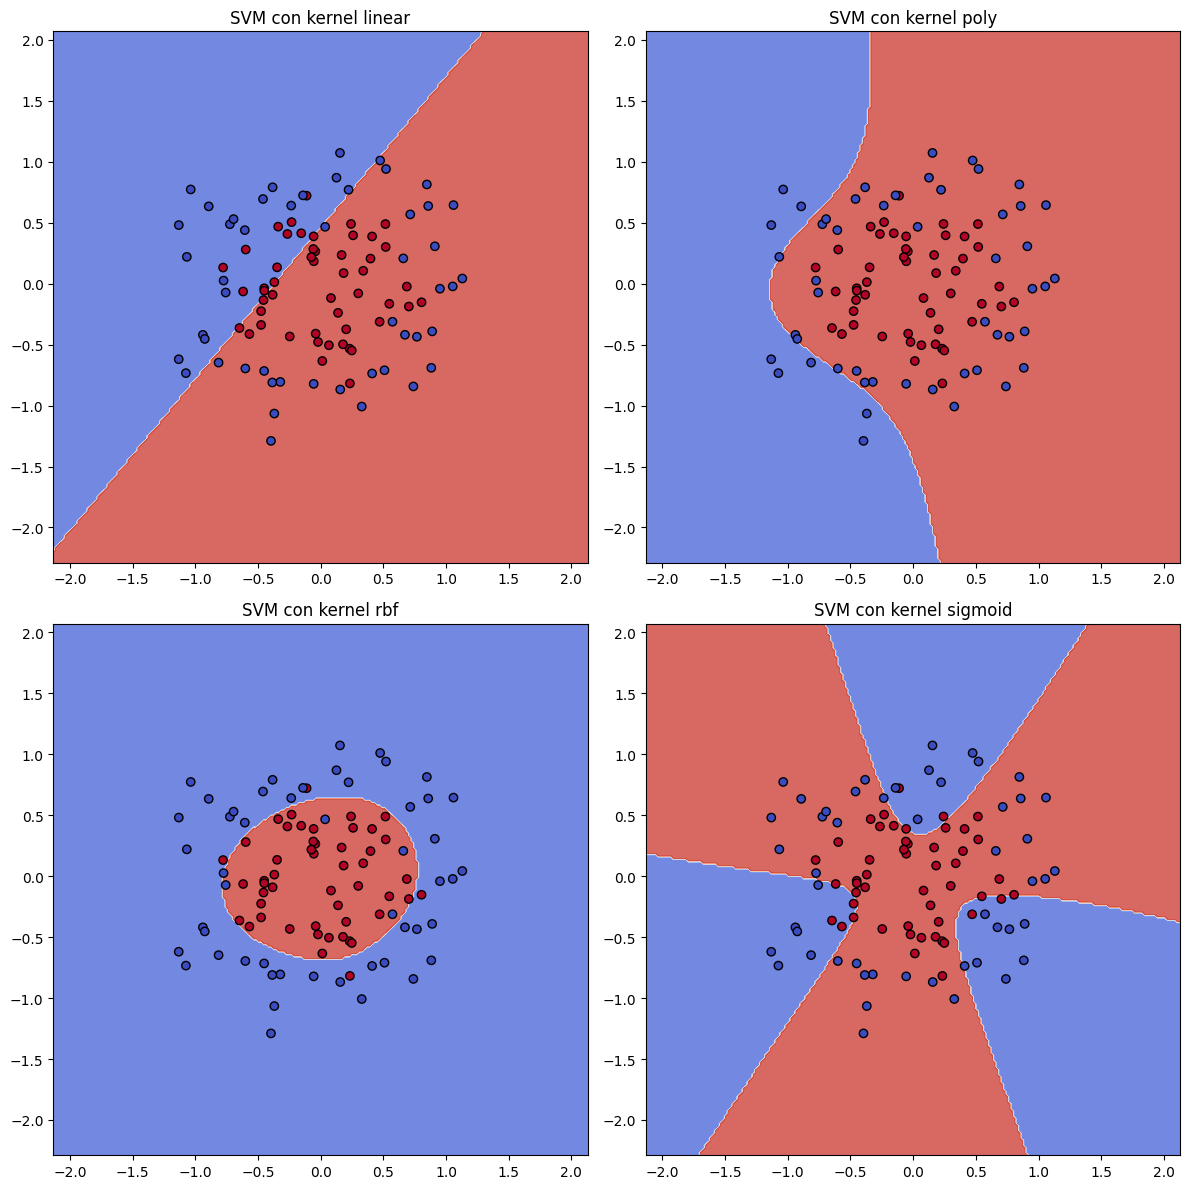

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Crear un conjunto de datos simulados
# X, y = datasets.make_circles(noise=0.2, factor=0.5, random_state=1)

# Crear una malla para trazar en el espacio de características
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.02  # tamaño del paso en la malla
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Preparar los plots
plt.figure(figsize=(12, 12))
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i, kernel in enumerate(kernels):
    # Entrenar el SVM
    clf = SVC(kernel=kernel, gamma=2, C=1.0)
    clf.fit(X, y)

    # Predecir y trazar la frontera de decisión
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(2, 2, i+1)
    plt.contourf(xx, yy, Z, alpha=0.8,cmap=plt.cm.coolwarm)

    # Trazar también los puntos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c = y, edgecolors='k',cmap=plt.cm.coolwarm)
    plt.title(f'SVM con kernel {kernel}')

plt.tight_layout()
plt.show()


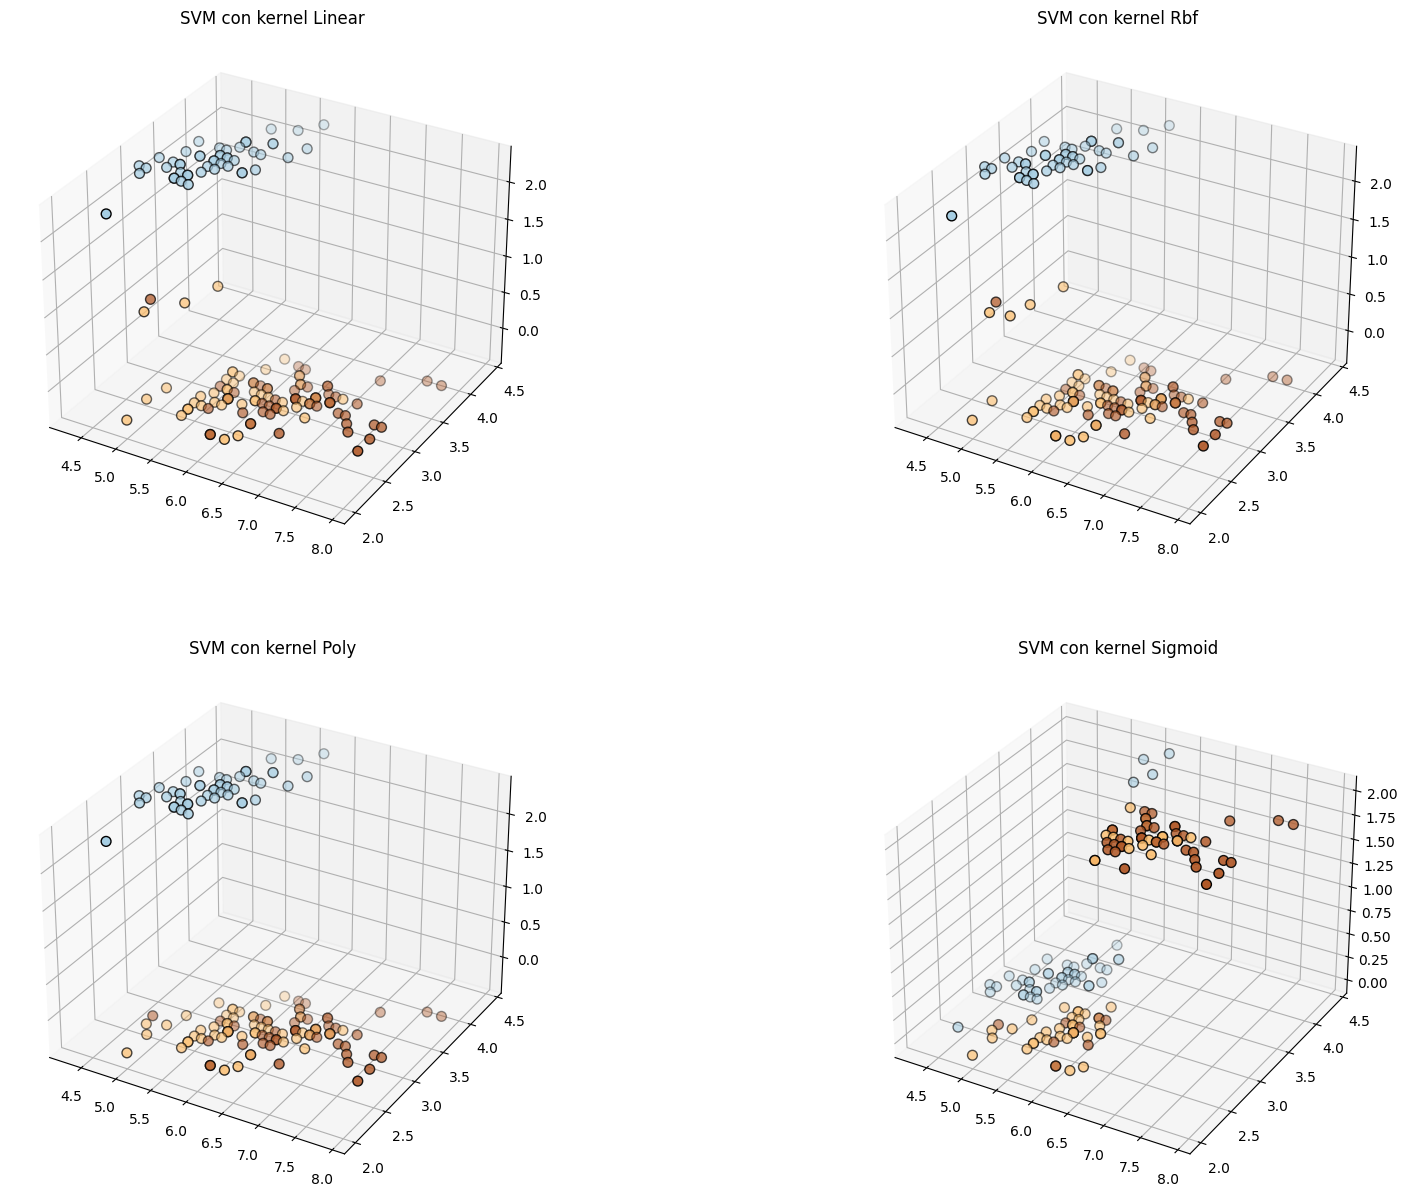

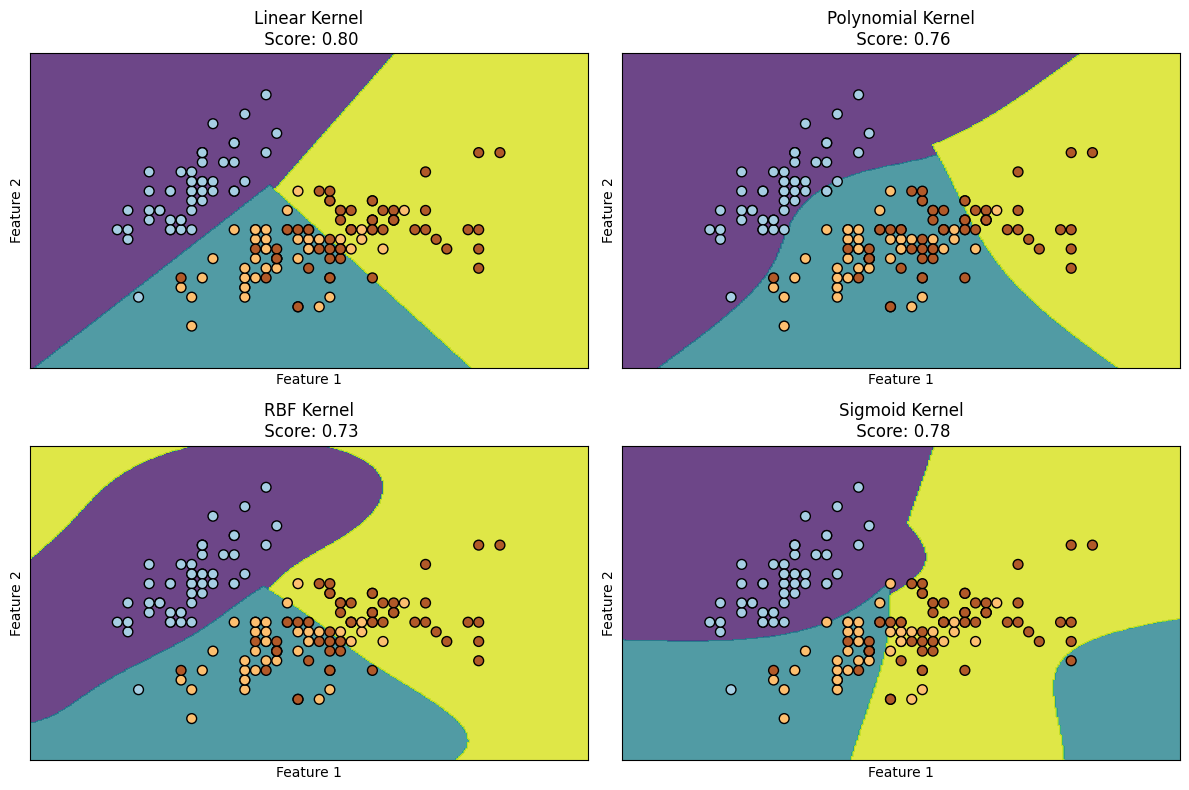

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
# Tomamos solo las dos primeras características para visualización.
X = iris.data[:, :2]
y = iris.target

# Entrenar diferentes modelos de SVM
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
trained_models = []

for kernel in kernels:
    clf = SVC(kernel=kernel, gamma='auto').fit(X, y)
    trained_models.append(clf)

# Títulos para los gráficos
titles = ['SVM con kernel ' + kernel.capitalize() for kernel in kernels]

# Configurar 4 subplots en 3D
fig, sub = plt.subplots(2, 2, figsize=(20, 15), subplot_kw={'projection': '3d'})

# Aplanar array de subplots para iterar más fácilmente
sub = sub.flatten()

# Generar espacio de características para la evaluación de los modelos
X0, X1 = X[:, 0], X[:, 1]
xx, yy = np.meshgrid(np.linspace(X0.min() - 1, X0.max() + 1, 50),
                     np.linspace(X1.min() - 1, X1.max() + 1, 50))

# Bucle para la visualización
for clf, title, ax in zip(trained_models, titles, sub):
     # Calcular la función de decisión
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # En el caso de multiclase, seleccionamos la primera columna que corresponde a la clase 0
    if Z.ndim > 1:
        Z = Z[:, 0]

    Z = Z.reshape(xx.shape)

    # Calcular la función de decisión para los puntos de datos reales
    Z_points = clf.decision_function(X)
    
    # En el caso de multiclase, seleccionamos la primera columna que corresponde a la clase 0
    if Z_points.ndim > 1:
        Z_points = Z_points[:, 0]
    
    # Hacer gráficos en 3D
    # ax.plot_surface(xx, yy, Z, rstride=1, cstride=1, linewidth=0, antialiased=False, cmap=plt.cm.Paired, alpha=0.3)

    # Agregar puntos de datos
    ax.scatter(X0, X1, Z_points, c=y, s=50, edgecolors='k', cmap=plt.cm.Paired)

    ax.set_title(title)

# Agregar una barra de colores para indicar los valores
# fig.colorbar(ax.plot_surface(xx, yy, Z, rstride=1, cstride=1, linewidth=0, antialiased=False, cmap=plt.cm.coolwarm), ax=sub, shrink=0.5, aspect=10)

plt.show()

# Crear datos simulados: vamos a usar un conjunto de datos simple, el iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # tomamos solo las primeras dos características para visualización
y = iris.target

# Normalización de los datos
sc = StandardScaler()
X = sc.fit_transform(X)

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Configurar los clasificadores SVM con diferentes kernels
classifiers = {
    'Linear': SVC(kernel='linear'),
    'Polynomial': SVC(kernel='poly', degree=3, gamma='auto'),
    'RBF': SVC(kernel='rbf', gamma='auto'),
    'Sigmoid': SVC(kernel='sigmoid', gamma='auto')
}

# Ajustar los modelos y hacer gráficos
plt.figure(figsize=(12, 8))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

for i, (name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train, y_train)
    
    # Puntuación del modelo
    score = clf.score(X_test, y_test)

    # Visualizar las fronteras de decisión
    plt.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)

    # Visualizar los puntos de datos
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(f'{name} Kernel\n Score: {score:.2f}')

plt.tight_layout()
plt.show()


#### Ventajas
* **Eficaz en Espacios de alta dimensión:** Las SVM son especialemente eficaces en casos donde el número de dimensiones es mayor al numero de muestras.
* **Versatilidad:** Las funciones de kernel pueden ser personalizadas según las necesidades del problema, lo que hace que las SVM sean extremadamente versatiles.
* **Generalización:** Debido a la optimización que implica la maximización del margen, las SVM tienden a tener buena generalización, lo que significa que relizan bien en datos no vistos, siempre y cuando el modelo no esté sobre ajustado.

#### Desventajas
* **Complejidad y Velocidad:** En conjuntos de datos muy grandes, el entrenamiento de una SVM puede ser computacionalmente intensivo y lento.
* **Elección del Kernel:** La elección del kernel y la optimización de sus parámetros puede ser complicada y requiere un conocimineto experto del conjunto de datos y el problema.
* **Poca interpretabilidad:**
Aunque las SVM pueden ofrecer una alta precisión, su funcionamiento interno no es fácilmente interpretable. Esto significa que no siembre es fácil entender por qué una SVM está haciendo ciertas predicciones.
* **Sensibilidad a los datos de entrenamiento:** Aunque las SVM son algo robustas al sobreajuste, especialmente con el uso de un margen suave pueden ser sensibles a los datos de entrenamiento; los vectores de soporte determinan el hiperplano, por lo que si los datos de entrenamiento cambian, el hiperplano también puede cambiar significativamente.